In [ ]:
pip install torch torchvision Pillow

In [1]:
import numpy as np          #Berechnung von Matrizen
import random               #Generierung zufälliger Zahlen oder anderer zufälliger Operationen
import matplotlib as plt    #Erstellung von Diagrammen
import torch                #PyTorch Bibliothek 
import torch.nn as nn
import torchvision          #Verarbeitung von Bildern

In [2]:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Überprüfung, ob NN auf der GPU (Grafikkarte) ausgeführt werden kann

      Dateiname  Label
0     cat.0.jpg      0
1     cat.1.jpg      0
2    cat.10.jpg      0
3   cat.100.jpg      0
4  cat.1000.jpg      0
Batch Bildform: (16, 128, 128, 3)
Batch Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


c:\Users\ZOSDEMIR\AppData\Local\anaconda3\envs\bigdataprojekt-2025\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 267s 170ms/step - accuracy: 0.9762 - loss: 0.0755
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 274s 173ms/step - accuracy: 0.9249 - loss: 0.3677
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 221s 141ms/step - accuracy: 0.1593 - loss: 1.3867
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 255s 162ms/step - accuracy: 0.2856 - loss: 0.9035
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 256s 163ms/step - accuracy: 0.3367 - loss: 0.8309


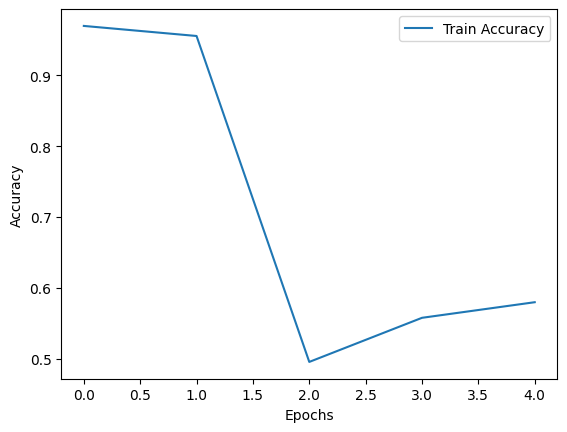

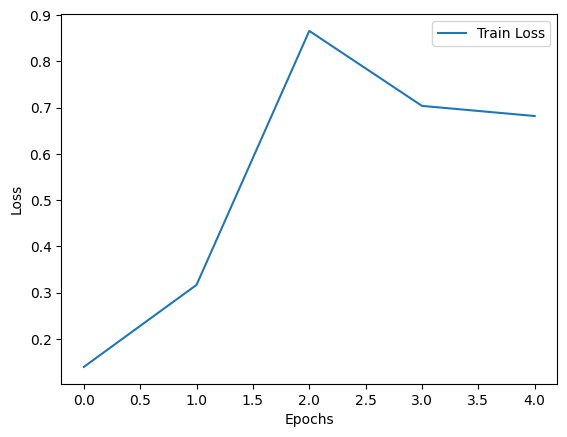

Modell gespeichert!


In [18]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt

# Pfade
train_dataset_path = "C:\\Users\\ZOSDEMIR\\Documents\\GitHub\\bigdataprojekt-2025\\train"
csv_datei_pfad = "C:\\Users\\ZOSDEMIR\\Documents\\GitHub\\bigdataprojekt-2025\\bild_labels.csv"

# CSV-Datei laden
df = pd.read_csv(csv_datei_pfad)
print(df.head())  # Überprüfen, ob die CSV korrekt geladen wurde

# Funktion zum Laden und Vorverarbeiten von Bildern
def load_and_preprocess_image(filename, label):
    # Bildpfad erstellen (TensorFlow-Operation statt os.path.join)
    img_path = tf.strings.join([train_dataset_path, filename], separator=os.sep)
    
    # Bild laden
    image = tf.io.read_file(img_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Bild dekodieren (RGB)
    image = tf.image.resize(image, (128, 128))      # Bildgröße auf 128x128 ändern
    image = image / 255.0                           # Normalisierung der Pixelwerte auf [0, 1]
    
    return image, label

# TensorFlow-Dataset erstellen
def create_tf_dataset(csv_path, batch_size):
    # CSV-Datei mit Pandas laden
    df = pd.read_csv(csv_path)
    
    # TensorFlow-Dataset aus DataFrame erstellen
    filenames = df['Dateiname'].values      # Bilddateinamen
    labels = df['Label'].values             # Labels (0 = Katze, 1 = Hund)
    
    # Dataset aus Bildnamen und Labels erstellen
    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
    
    # Vorverarbeitung der Bilder anwenden
    dataset = dataset.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    
    # Daten mischen, in Batches aufteilen und für optimale Leistung vorbereiten
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

# Trainings-Dataset erstellen
batch_size = 16
train_dataset = create_tf_dataset(csv_datei_pfad, batch_size)

# Beispiel: Einen Batch anzeigen
for images, labels in train_dataset.take(1):  # Nur einen Batch anzeigen
    print("Batch Bildform:", images.shape)
    print("Batch Labels:", labels.numpy())

# Modellarchitektur definieren
model = tf.keras.Sequential([
    # 1. Convolutional Layer
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 2. Convolutional Layer
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 3. Convolutional Layer
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # 4. Flatten Layer
    tf.keras.layers.Flatten(),

    # 5. Dense Layer
    tf.keras.layers.Dense(128, activation='relu'),

    # 6. Dropout
    tf.keras.layers.Dropout(0.5),

    # 7. Output Layer
    tf.keras.layers.Dense(2, activation='softmax')
])

# Modellzusammenfassung
model.summary()

# Kompilieren des Modells
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Für Labels als Ganzzahlen (0 oder 1)
    metrics=['accuracy']
)

# Modelltraining
EPOCHS = 5
history = model.fit(
    train_dataset,
    epochs=EPOCHS
)

# Trainingsergebnisse visualisieren: Genauigkeit
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Trainingsergebnisse visualisieren: Verlust
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Modell speichern
model.save('cat_dog_classifier.h5')
print("Modell gespeichert!")


In [ ]:
pip install tensorflow